In [ ]:
#References
#https://github.com/Rushikesh8983/DataScienceMasters_Session31Assignment1/blob/master/Session31Assignment1.ipynb
#https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#pca-example-with-iris-data-set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
import pandas as pd

In [ ]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df.loc[:,features].values
y = df.loc[:,['species']].values


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
principalcomponents=pca.fit_transform(x)
pcadf=pd.DataFrame(data=principalcomponents , columns = ['PCA1','PCA2','PCA3'])
pcadf

,PCA1,PCA2,PCA3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079
...,...,...,...
145,1.944110,0.187532,0.177825
146,1.527167,-0.375317,-0.121898
147,1.764346,0.078859,0.130482
148,1.900942,0.116628,0.723252


In [ ]:
Finaldf = pd.concat([pcadf , df['species']] , axis=1)

In [ ]:
Finaldf

,PCA1,PCA2,PCA3,species
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa
...,...,...,...,...
145,1.944110,0.187532,0.177825,virginica
146,1.527167,-0.375317,-0.121898,virginica
147,1.764346,0.078859,0.130482,virginica
148,1.900942,0.116628,0.723252,virginica


In [ ]:
x_cord = Finaldf['PCA1']
y_cord = Finaldf['PCA2']
z_cord = Finaldf['PCA3']

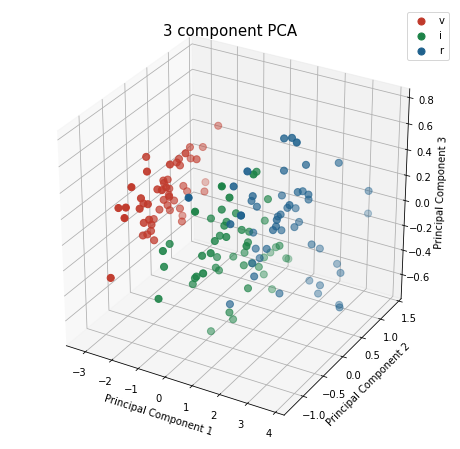

In [ ]:
fig = plt.figure(figsize = (8,8))
a = fig.add_subplot(111, projection='3d')
a.set_xlabel('Principal Component 1')
a.set_ylabel('Principal Component 2')
a.set_zlabel('Principal Component 3')
a.set_title('3 component PCA', fontsize = 15)
species = ['setosa','versicolor','virginica']
colour = ['#C0392B','#1D8348','#1F618D']
for species,colour in zip(species,colour):
    Y = Finaldf['species'] == species
    a.scatter(Finaldf.loc[Y, 'PCA1']
               , Finaldf.loc[Y, 'PCA2']
               , Finaldf.loc[Y, 'PCA3']
               , c = colour
               , s = 50)
a.legend(species)
a.grid()